## Исследование  поведения сотрудников за время работы в организации

In [7]:
# загружаем все необходимые нам в работе библиотеки
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import skew, kurtosis
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [8]:
#  загружаем и читаем файл для дальнейшей работы
df = pd.read_csv('hr.csv')

In [9]:
# читаем несколько первых строк файла, чтобы посмотреть, с какими данныем и нам предстоит иметь дело
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Нам досталась таблица с основными сопутсвующими параметрами сотрдников в время рабоыт в организации
* Уровень удовлетворенности
* Последнее повышение
* Номер проекта в котором учавствовал сотрудник
* среднее количество часов в месяц
* время проведенное в компании (год)
* инцидент произошедший на работе (да/нет)
* Уволен/Работает
* Продвижения по карьерной лестнице за последние 5 лет
* Департамент
* Уровень зарплаты

Из всего датасета мы видем 2 категориальные переменные : департамент и зарплата

##  Подготовка датасета

Для работы с датасетом посмотрим наличие значений null и типы данных.

In [10]:
# смотрим файл на наличие null и трудночитаемых типов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
# Количество null в разрезе переменных
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

### Рассчет основных статистик для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

Рассчитаем основные показатели по всем переменным и найдем, максимум, медиану, сроеднию и минимум.
К этой таблице придется обращаться при дальнейшем исмследование датасета.

In [14]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Найдем зависимости по переменным. Для этого воспользуемся матрицей корелляции и тепловой картой корелляции построенной с помощью библиотеки seaborn

In [16]:
# Рассчитать и визуализировать корреляционную матрицу для переменных
df_corr = df.corr()
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


### Рассчитаем и визуализируем корреляционную матрицу для переменных.

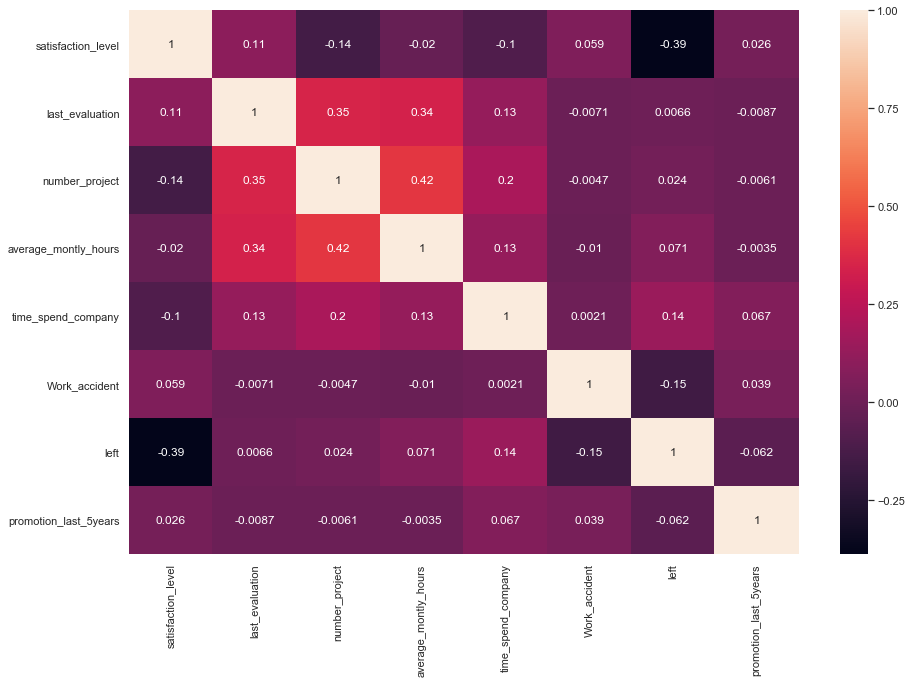

In [9]:
sns.set(rc=({'figure.figsize':(15,10)}))
sns.heatmap(df_corr,annot = True);

Из предоставленных данных. Можно выявить наиболее пересекающеся между собой данные.
    * satisfaction_level и number_project
    * Work_accident и left
    * last_evaluation and average_montly_hours
    
Исследуем зависимости номера проекта на котором работал сотрудник и степени удовлетворенности работой, интересная зависимость так как навернео может существовать очень сложный проект или команда этого проекта которая не ладит с другими людьми от чего там большая текучка чем на других. Исследование зависимотсти инцидента на работе и увольнения, действиетльно ли, что сотрудники чаще увольняются с работы если с ними произошел инциндент или эта цифра характерна для всех сотрудников не зависимо или зависимо через какие то другие факторы. 
Зависисмость повышения от среднего количества проработаных часов в месяц, мы не сильную зависимость и можем немного объяснить эту ситуацию тем, что чем больше человек работает в организации тем чаще такой сотрудник идет на повышение.

### Визуализируем несколько взаимосвязей между переменными.

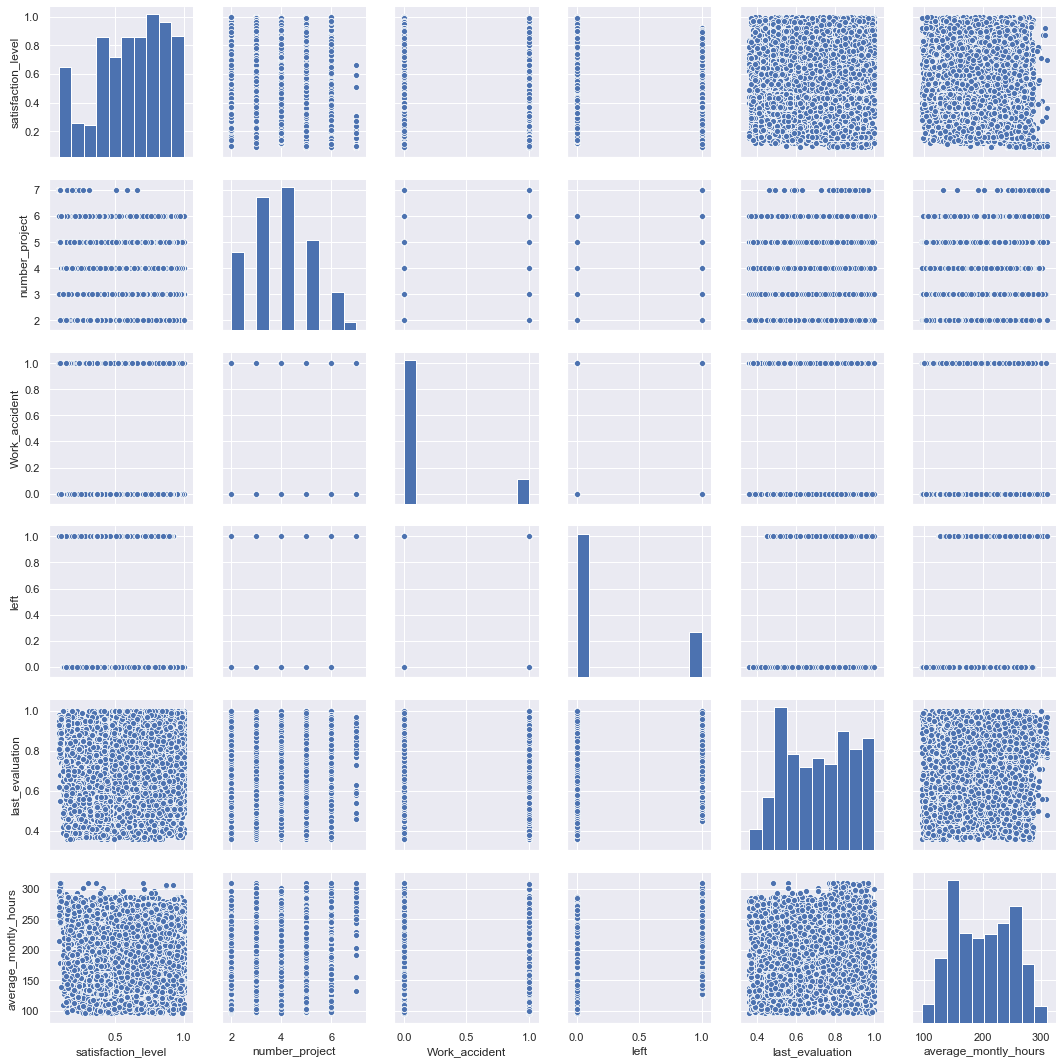

In [10]:
sns.pairplot(df, vars = ['satisfaction_level','number_project','Work_accident',
                         'left', 'last_evaluation', 'average_montly_hours'], kind = 'scatter');

* Если проверять последовательно зависимость наших переменых то из Уровня удовлетворенности и номера проекта следует, что больше неудовлетворены люди на последнем 7 проекте в остальных уровень примерно одинаковый.
* инцидент на работе и уход нам показывает только то что все 4 варианции случались: инцидент и увольнение, без инцидентов и увольнений, увольнение без инцидента, инцидент и без увольнения.
* Для среднего числа часов работы в месяц и следующего повышения, не прослеживается четкой зависимости.  

### Проверим свзять между несколькими гипотезами на основе полученных данных

Проверим как причину зависимость от увольнения и среднего числа рабочих часов в месяц, если там большая разница между этими выборками. Если наша теория подтвердится это будет прицинедент для дальнейшего изучения а если нет, то выборки одинаковы и явной зависимости между именно этими двум пермеными нет

Нулевая гипотеза: Уволенные и действующие сотрудники работают разное среднее количество часов в месяц

In [131]:
# Оберем нужные нам выборки.
df_fair = df[df['left'] == 1]['average_montly_hours']
df_unfair = df[df['left'] != 1]['average_montly_hours']

# Посмотрим объем датафрейма, чтобы в итоге привести их одному значению.
print(len(df_fair))
print(len(df_unfair))

3571
11428


In [132]:
# приравниваем количество выборок.
fair = df_fair.sample(3571)
unfair = df_unfair.sample(3571)

In [133]:
statistics.variance(fair), statistics.variance(unfair)

(3745.7858381437145, 2089.6677880561356)

In [134]:
results = stats.ttest_ind(fair,unfair, equal_var= True)

In [135]:
print('p-значение:', results.pvalue)

if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.836395665474981e-11
Отвергаем нулевую гипотезу


#### Люди работают примерно одинаковое среднее количество часов в месяц и на увольнение в общей выборке это не зависит.

### Следующая гипотез.
    Нулевая гипотеза: C средней и высокой зарплате нет разницы в удовлетворенности сотрудников.
        возьмем только работающих сотрудников.

В этой гипотезе мы проверим теорию, есть ли большая разница в удовлетворенности сотрудника работай у которого средний и высокий доход. Вообще считается, чем больше зарабатое тем больше сотрудник удовлетворен работай.

In [19]:
# Проверим какие данные даны как категориальные в переменной "заработок"
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [20]:
df_unleft = df[df['left'] == 0]
df_high_salary = df_unleft[df_unleft['salary'] == 'high']['satisfaction_level']
df_medium_salary = df_unleft[df_unleft['salary'] != 'medium']['satisfaction_level']

# Посмотрим объем датафрейма, чтобы в итоге привести их одному значению.
print(len(df_high_salary))
print(len(df_medium_salary))

1155
6299


In [21]:
high_salary = df_high_salary.sample(1155)
medium_salary = df_medium_salary.sample(1155)

In [22]:
print(len(high_salary))
print(len(medium_salary))

1155
1155


In [23]:
statistics.variance(high_salary), statistics.variance(medium_salary)

(0.04839915340580852, 0.04640753216742818)

In [24]:
results = stats.ttest_ind(high_salary,medium_salary, equal_var= True)

In [25]:
print('p-значение:', results.pvalue)

if (results.pvalue > .05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0072151481210149145
Не получилось отвергнуть нулевую гипотезу


 Разница в выборках есть и мы не смогли отвергнуть нулевую гипотезу. Действительно удовлетворенность от уровня зарплаты существует. Если мы брали уровнь значимости в 5%. Значит теперь можно будет поработать с этими переменными и выяснить куда и на сколько идет отклонение и такое ли оно значительное

### Рассчитать сколько работников работает в каждом департаменте.

In [29]:
# Для этого используем value_count
df_sales = df['sales'].value_counts()
df_sales

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

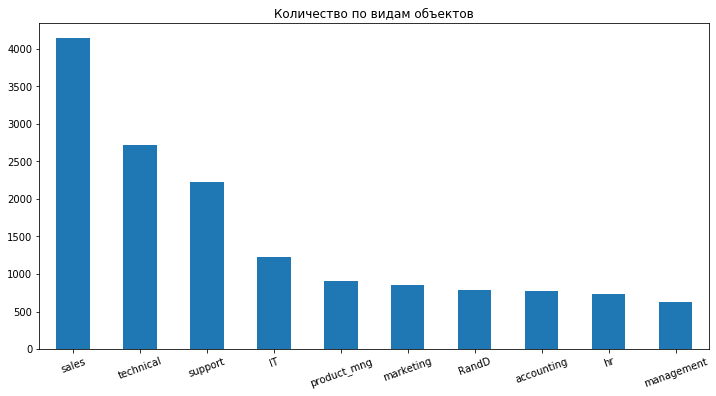

In [28]:
title_n = 'Количество сотрудников по департаментам'
df_sales.plot.bar(figsize=(12, 5), title = title_n);
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.xticks(rotation=20)
plt.show()

Если мы берем, что каждая запись это отедльный работник то можно воспользоваться простым способом value_counts() для подсчета сотрдников в разрезе депортамента. Из выборки видим, что самым наибольшимм депортаментом считается, отдел продаж с 4140 сотрдуников а дальше технический депортамет с 2720 сотрудниками.

###  Показать распределение сотрудников по зарплатам.

Для того чтобы найти распределение по категории зарплат воспользуемся, подсчетом через функцию value_counts и посроем круговую диаграмму для наглядности.

In [32]:
df_salary = df['salary'].value_counts().reset_index()
df_salary

,index,salary
0,low,7316
1,medium,6446
2,high,1237


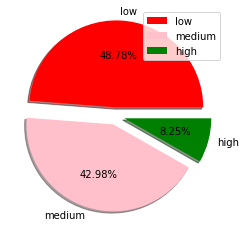

In [40]:
size = list(df_salary['salary'])
colors = ['red', 'pink', 'green']
labels = "low", "medium", "high"
explode = [0.1, 0.1, 0.1]

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.legend()
plt.show()

из кругового графика видно, что распределение между средней и низкой зарплатой почти на ровне, но 8% из выборки средней зарплаты отнимает группа с высокой зарплатой.

###  Показать распределение сотрудников по зарплатам  в разрезе депортамента

Для того чтобы выяснить сколько людей находятся в разных депортаментах в разрезе зарплат, добавим поля в наш датафрейм каторое будет агрегировать строки и сдеаем таблицу с помощью pivot_table для наглядного представления о количестве сотрудников. Визуализируем таблицу с помощью распределенной Гистограммы в разрезе депортамента.

In [80]:
df['agregate'] = 1
df_dep_sales = df.pivot_table(index=['sales'], columns= 'salary', values=['agregate'], aggfunc='sum').reset_index()
df_dep_sales

sales agregate             
salary                  high   low medium
0                IT       83   609    535
1             RandD       51   364    372
2        accounting       74   358    335
3                hr       45   335    359
4        management      225   180    225
5         marketing       80   402    376
6       product_mng       68   451    383
7             sales      269  2099   1772
8           support      141  1146    942
9         technical      201  1372   1147

In [81]:
df_dep_sales.columns = df_dep_sales.columns.droplevel(0)
df_dep_sales = df_dep_sales.reset_index().rename_axis(None, axis=1)
df_dep_sales

,index,,high,low,medium
0,0,IT,83,609,535
1,1,RandD,51,364,372
2,2,accounting,74,358,335
3,3,hr,45,335,359
4,4,management,225,180,225
5,5,marketing,80,402,376
6,6,product_mng,68,451,383
7,7,sales,269,2099,1772
8,8,support,141,1146,942
9,9,technical,201,1372,1147


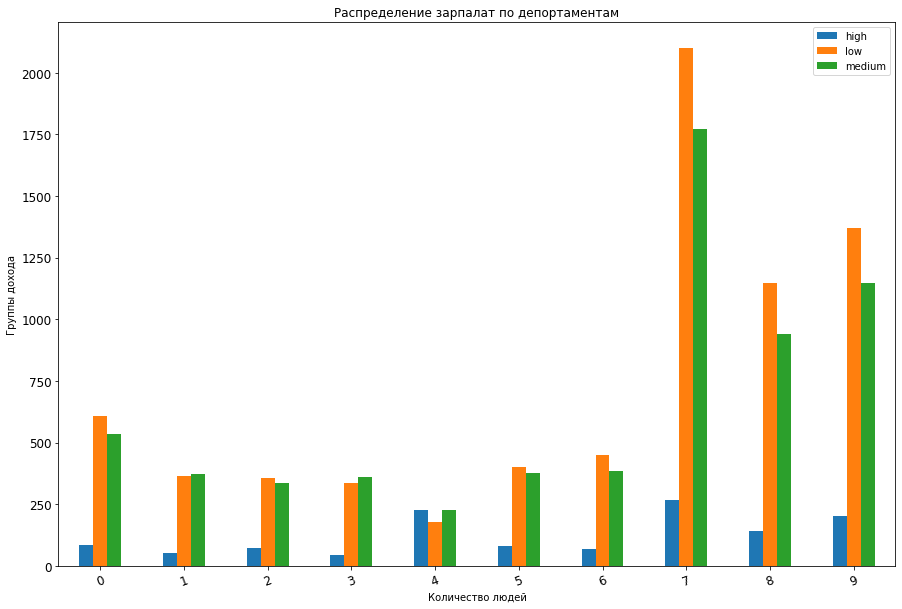

In [83]:
title_n = "Распределение зарпалат по депортаментам"
ax = df_dep_sales[['high','low','medium']].plot(kind='bar', title = title_n,  figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Количество людей", fontsize=10)
ax.set_ylabel("Группы дохода", fontsize=10)
plt.xticks(rotation=20)
plt.show()

Как видим больше всего чегловек и больше всего выборка по зарплатам нахдится в Депортаменте продажы за ним идет депортамент поддрежки и технический депортамент.

## Соколько человек покинуло компанию

In [ ]:
Воспользуемся выбркой по определенному полю и агрегируем значения по количеству.

In [149]:
df_left = df[df['left'] == 1]
left_company = df_left['agregate'].count()

print(f'{left_company} сотрудников покинуло компанию')

3571 сотрудников покинуло компанию


### Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Для того чтобы ответить на этот вопрос нужно найти зависимости в резрезе уволен не уволен.
Для этого выведем график в разрезе уволен не уволен и выявим наиболее важные для нас зависимости для построения гипотез.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
agregate                 14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [89]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,agregate
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


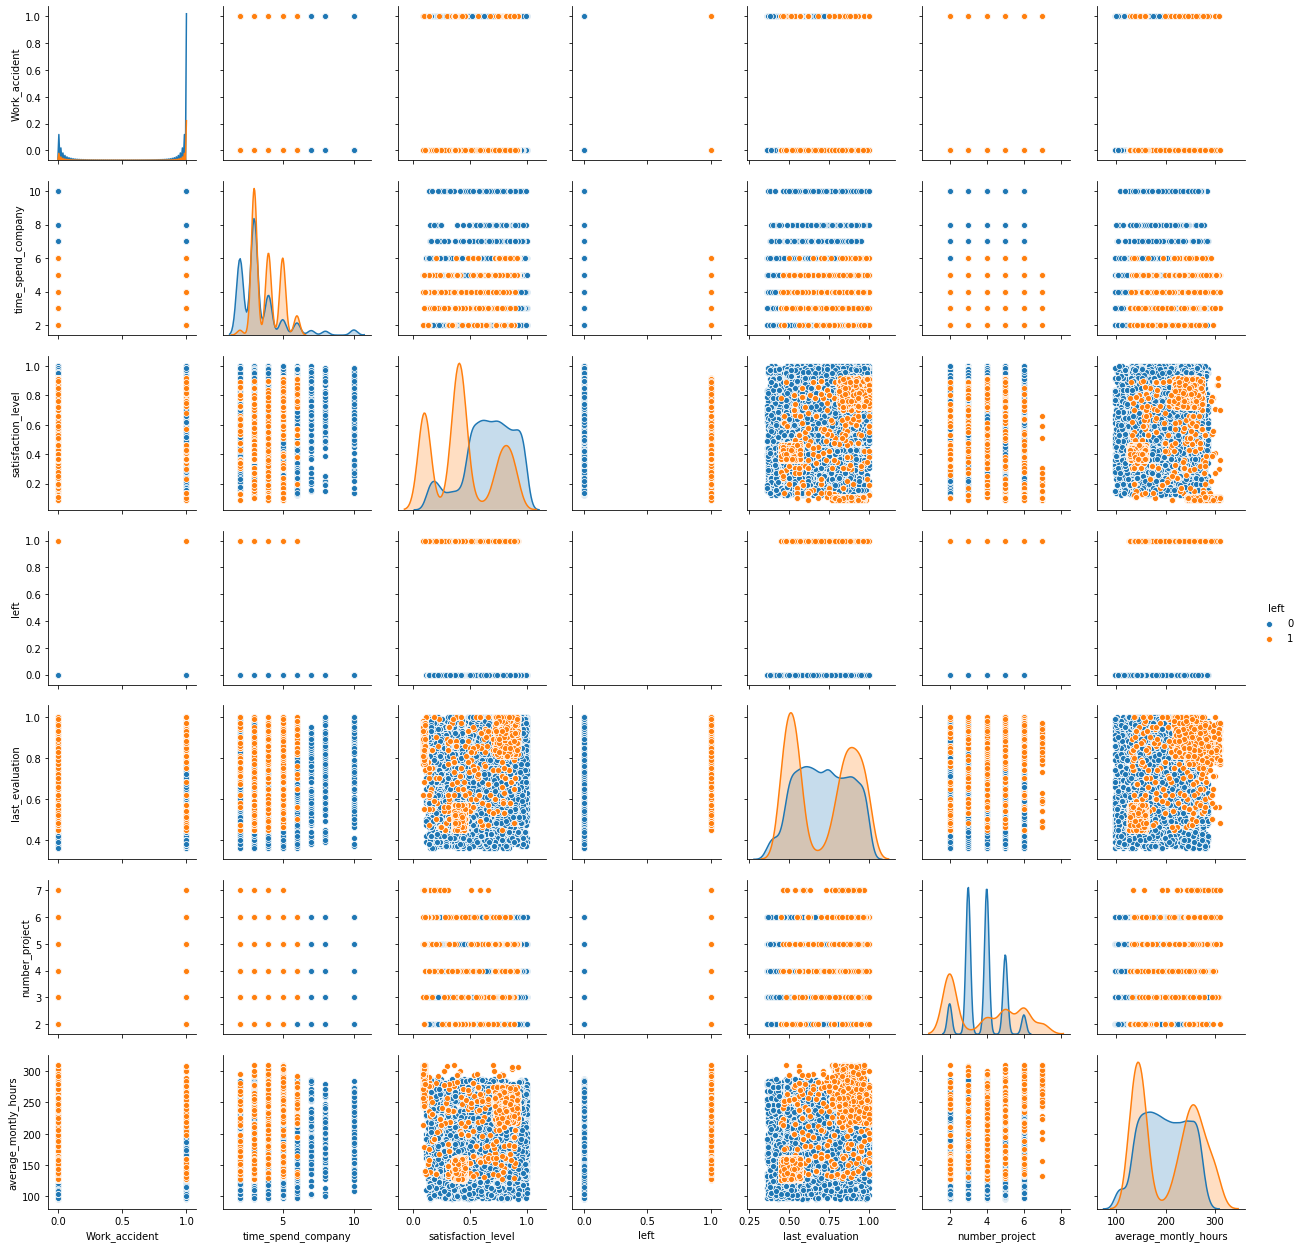

In [90]:
fig = sns.pairplot(data=df[['Work_accident', 'time_spend_company','satisfaction_level'\
                            ,'left', 'last_evaluation', 'number_project', 'average_montly_hours']], hue='left')
plt.show()

Проверим так же две гипотезы, почему сотрудники увольняются. Первая наиболее для меня очевидная из графиков это зависимость от проекта на котором работал сотрудник и вторая после 6 го года работы в копании люди уходят.

## Гипотеза: Люди увольняются если проработали больше 5 лет

In [171]:
# нулевая гипотеза: люди проработавшие больше 5 лет чаще уходят из компании.

# Оберем нужные нам выборки.
df_to_6_year = df[df['time_spend_company'] < 6]['left']
df_6_year_after = df[df['time_spend_company'] >= 6]['left']

# Посмотрим объем датафрейма, чтобы в итоге привести их одному значению.
print(len(df_to_6_year))
print(len(df_6_year_after))

13717
1282


In [172]:
to_6_year = df_to_6_year.sample(1282)
year_after = df_6_year_after.sample(1282)

In [173]:
statistics.variance(to_6_year), statistics.variance(year_after)

(0.17560201237089296, 0.1365553919580671)

In [174]:
results = stats.ttest_ind(to_6_year,year_after, equal_var= True)

In [175]:
print('p-значение:', results.pvalue)

if (results.pvalue < .05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.277568534604835e-05
Отвергаем нулевую гипотезу


гипотезу отвергаем, так как выборки при критическом значение не показали явного перевеса.

### Нулевая гипотеза: увольнение зависит проекта на котором находится сотрудник

Зависимоть увольнеия от номера проекта на котором работает сотрудник. Гипотеза должна показать, отрицание нулевой гипотезы это будет занчить, что наша выборка неравномерна и после этого можно будет продолжить исследование и найти проект в котором сотрдники увольняются чаще чем в других.

In [176]:
# Оберем нужные нам выборки.
df_unleft_pr = df[df['left'] == 0]['number_project']
df_left_pr = df[df['left'] == 1]['number_project']

# Посмотрим объем датафрейма, чтобы в итоге привести их одному значению.
print(len(df_unleft_pr))
print(len(df_left_pr))

11428
3571


In [178]:
unleft_pr = df_unleft_pr.sample(3571)
left_pr = df_left_pr.sample(3571)

In [179]:
statistics.variance(unleft_pr), statistics.variance(left_pr)

(0.9789899493821611, 3.305725314488719)

In [180]:
results = stats.ttest_ind(unleft_pr,left_pr, equal_var= True)

In [181]:
print('p-значение:', results.pvalue)

if (results.pvalue < .05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08808995906074851
Не получилось отвергнуть нулевую гипотезу


Как видим, что значение выбрки не превысили нашего критичесткого значения и по этому мы не можем утверждать о зависимости этих двух переменных.